In [41]:
import fastf1
from fastf1.plotting import setup_mpl
import matplotlib.pyplot as plt

In [42]:
# === Configurazioni iniziali ===
fastf1.Cache.enable_cache('cache')   # Abilita la cache
setup_mpl(color_scheme='fastf1')     # Stile grafico ispirato alla F1

C:\Progetti\Luigi\python\f1-telemetry-analyzer\env\Lib\site-packages\fastf1\plotting\_plotting.py:98: FutureWarning: FastF1 will stop modifying the default Matplotlib settings in the future.
To opt-in to the new behaviour and remove this warning, explicitly set `misc_mpl_mods=False` when calling `.setup_mpl()`.
  warnings.warn(


In [43]:
# === Parametri della session ===
year = 2023
gp = 'Monza'
session_type = 'Q'
driver_1 = 'HAM'
driver_2 = 'VER'

In [44]:
# === Caricamento dati ===
session = fastf1.get_session(year, gp, session_type)
session.load()

core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['55', '1', '16', '63', '11', '23', '81', '44', '4', '14', '22', '40', '27', '77', '2', '24', '10', '31', '20', '18']


In [45]:
# === Estrazione giri più veloci ===
lap_1 = session.laps.pick_drivers(driver_1).pick_fastest()
lap_2 = session.laps.pick_drivers(driver_2).pick_fastest()

In [46]:
# === Telemetria con distanza ===
tel1 = lap_1.get_car_data().add_distance()
tel2 = lap_2.get_car_data().add_distance()

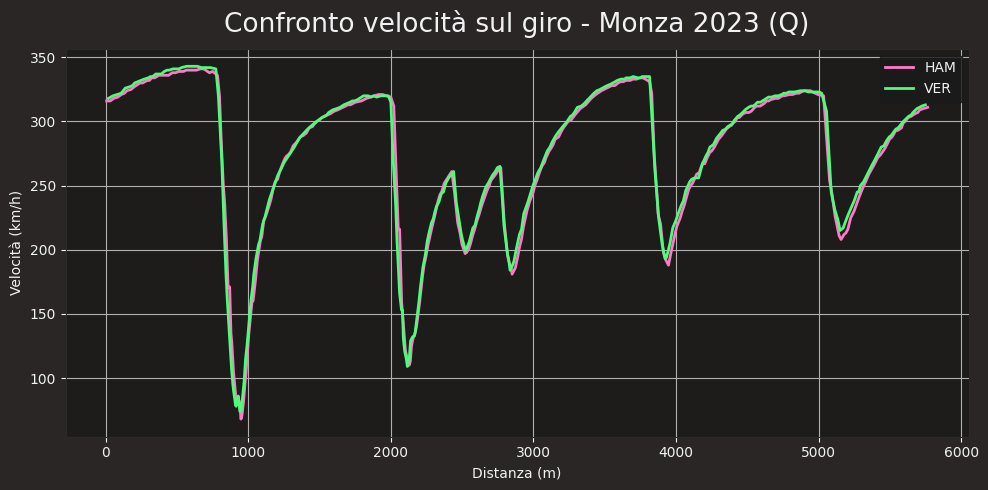

In [47]:
# === Plot ===
plt.figure(figsize=(10,5))   # Imposta dimensione del grafico

plt.plot(tel1['Distance'], tel1['Speed'], label=driver_1, linewidth=2)
plt.plot(tel2['Distance'], tel2['Speed'], label=driver_2, linewidth=2)

plt.title(f"Confronto velocità sul giro - {gp} {year} ({session_type})")
plt.xlabel('Distanza (m)')
plt.ylabel('Velocità (km/h)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()